## Assignment
Yeah ! Let's start with our actual project. In this assignment we will load the database and do preprocessing tasks.
Ensure you have following packages installed
1. numpy
2. pandas  
( Hope you are familiar with above two modules well )
3. nltk (don't worry, we just need this to remove stopwords while preprocessing)
4. tensorflow
5. keras
6. scikit-learn

In [8]:
'''
Importing essential libraries and functions
'''
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import io
import json 

## 1. Loading the IMDB Reviews Dataset

In [9]:
# TODO: 
'''
Using pandas load the imdb reviews csv file
Analyse its shape and columns
Check for missing data and remove those rows
'''
 
# Loading the IMDB Reviews Dataset
dataset_path = 'IMDB_dataset.csv'

df = pd.read_csv(dataset_path) 

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# checking for missing data
print("Missing data:")
print(df.isnull().sum())
 
# removing such rows
df.dropna(inplace=True)

#checking 
print("After removing missing data:")
print("Dataset Shape:", df.shape) 

df.reset_index(drop=True, inplace=True)

Dataset Shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')
Missing data:
review       0
sentiment    0
dtype: int64
After removing missing data:
Dataset Shape: (50000, 2)


## 2. Data Preprocessing

In [10]:
#TODO : Complete the function to preprocess the text data

def preprocessing(sentence):
    # First make the sentence lowercase
    sentence = sentence.lower()
    # Remove all html tags from the sentence i.e replace anything between <> with space
    # Hint use Regular Expression i.e. re.sub()
    sentence = re.sub(r'<.*?>', ' ', sentence) 
    
    # Remove all special characters i.e. anything other than alphabets and numbers. Replace them with space
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence) 
    
    # Remove all single characters i.e. a-z and A-Z and Replace them with space
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence) 
    
    # Remove all multiple spaces and replace them with single space
    sentence = re.sub(r'\s+', ' ', sentence)
    
    # Use the nltk library to remove all stopwords from the sentence
    # stopwords are the words like and, the, is, are etc.
    words = nltk.word_tokenize(sentence)
    stop_words = set(stopwords.words('english')) 
    words = [word for word in words if word not in stop_words]
    sentence = ' '.join(words)  
    
    # return the sentence
    return sentence
    
#     pass # remove this line after writing the code

In [11]:
# TODO : 
nltk.download('stopwords')
nltk.download('punkt') 
# Call the preprocessing function for each review in the dataframe and
# save the results in a new list of preprocessed_reviews
preprocessed_reviews = [preprocessing(review) for review in df['review']]  
# This list will be your input to the neural network
# We will call this list as X from now on
X = preprocessed_reviews
print(X[:5]) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street sk

In [12]:
# TODO :
# Convert sentiment column in the dataframe to numbers
# Convert positive to 1 and negative to 0 and store it in numpy array
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
# We will call this numpy array as y from now on
y = np.array(df['sentiment']) 
print(y[0:5])    

[1 1 1 0 1]


In [13]:
# TODO : Split the data into training and testing (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 
print("Training data shape:", len(X_train), len(y_train))
print("Testing data shape:", len(X_test), len(y_test)) 

Training data shape: 40000 40000
Testing data shape: 10000 10000


## Preparing embedding layer
Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then **used as the first layer for the deep learning model like LSTM**.  
To know more about word embedding you may refer to following video
https://www.youtube.com/watch?v=9S0-OC4LFNo  
#### Tokenize the data

In [14]:
# Initialize the tokenizer
word_tokenizer = Tokenizer() 
# TODO: Fit the tokenizer on the training data (X_train)
word_tokenizer.fit_on_texts(X_train) 
# TODO: Convert training data to sequences of integers
# Hint: Use texts_to_sequences method
X_train_sequences = word_tokenizer.texts_to_sequences(X_train)
# TODO: Convert test data to sequences of integers 
# Hint: Use texts_to_sequences method
X_test_sequences = word_tokenizer.texts_to_sequences(X_test)
# End TODO  
# Saving the tokenizer in a json file (Already done for you)
# This will be used later for prediction on data in next assignments
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
    
# Vocab_length is the number of unique words in our dataset
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length  

92321

#### Padding

In [15]:
# Padding all reviews to be of same length 'maxlen' words
maxlen = 200  
# You can try different dimensions like 50, 100, 200 and 300
# and see how the model performs in next week

# TODO: Pad the training data sequences
# Hint: Use pad_sequences with 'post' padding and maxlen=maxlen
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)

# TODO: Pad the test data sequences
# Hint: Use pad_sequences with 'post' padding and maxlen=maxlen
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)
print("Padded training data shape:", X_train_padded.shape)
print("Padded test data shape:", X_test_padded.shape)  

Padded training data shape: (40000, 200)
Padded test data shape: (10000, 200)


#### Glove Embedding

In [16]:
# Initialize an empty dictionary for embeddings
embeddings_dictionary = dict() 

# Open the GloVe file (a2_glove.6B.100d.txt) with utf-8 encoding
glove_file = open('glove_embeddings.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close() 

# TODO : Create an embedding matrix where each row corresponds to the index of the
# unique word in the dataset and each column corresponds to the word vector
# in the GloVe embedding 
# So the matrix will have vocab_length rows and maxlen columns
embedding_dim = 100  
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    if index < vocab_length:
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
print("Embedding matrix shape:", embedding_matrix.shape)    

Embedding matrix shape: (92321, 100)


In [17]:
# Training the model with LSTMs

from keras.layers import LSTM 

In [18]:
# TODO 1: Create a model. How many layers to use? What all layers to use? Try figuring out!

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional

# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))

# LSTM layer (you can also try Bidirectional LSTM)
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))

# Dropout for regularization
model.add(Dropout(0.5))

# Fully connected (Dense) layer
model.add(Dense(units=128, activation='relu'))

# Output layer (using sigmoid for binary classification)
model.add(Dense(units=1, activation='sigmoid'))  

C:\Users\kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# TODO 2: Compile the model with the appropriate loss function and optimizer. 
# You may use the 'adam' optimizer and 'binary_crossentropy' as the loss function. Use metrics=['acc'].
# (Optional) Try printing the model summary to see the model 

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()   

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       9,232,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,232,100 (35.22 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9,232,100 (35.22 MB)

Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 140s 136ms/step - accuracy: 0.6490 - loss: 0.6288 - val_accuracy: 0.8180 - val_loss: 0.4182
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 121s 121ms/step - accuracy: 0.8195 - loss: 0.4114 - val_accuracy: 0.8535 - val_loss: 0.3443


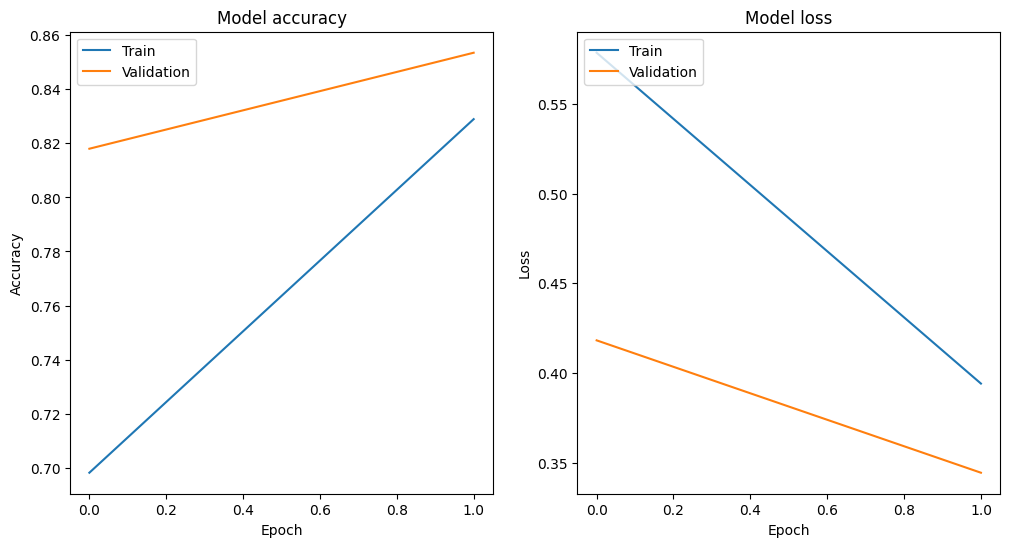

In [20]:
# TODO 3: Train the model with the training data. 
# Try using different batch sizes and number of epochs to see how the model performs.

# Training parameters
batch_size = 32  # You can try different values like 64, 128
epochs = 2  # You can try different values like 20, 50

# Train the model
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

# Optional: Plotting the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show() 

In [21]:
# TODO 4: Evaluate the model with the test data.

test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8459 - loss: 0.3512


In [22]:
# TODO 5: Print the accuracy of the model.

print(f'Test Accuracy: {test_acc:.4f}') 

Test Accuracy: 0.8418


In [23]:
model.save('my_new_model.keras')   # I ran first on epochs 10 and then on 2, so currently model may not have perfect hyperparameters

In [24]:
# making predictions

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_new_model.keras')  

In [25]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
with io.open('b3_tokenizer.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    word_tokenizer = tokenizer_from_json(data)

# Example new texts/reviews
new_texts = [
    "Philips Norelco Series 5000 Wet & Dry Men's Rechargeable Electric Shaver - X5004/84 now $19.99 via Target",
    "Its time to go for holiday and enjoy and not end up in a distressed mindset",
    "i do not want to be negative",
    "I am very happy today",
    "i am not feeling good",
    "I am not sad",
    "Its time to go for holiday and have fun and not be stressed"
]


# Tokenize the new texts
new_texts_sequences = word_tokenizer.texts_to_sequences(new_texts)

# Pad the sequences
new_texts_padded = pad_sequences(new_texts_sequences, padding='post', maxlen=200)

In [26]:
# Make predictions
predictions = model.predict(new_texts_padded)

# Interpret the predictions
for i, review in enumerate(new_texts):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
Review: Philips Norelco Series 5000 Wet & Dry Men's Rechargeable Electric Shaver - X5004/84 now $19.99 via Target
Predicted Sentiment: Negative

Review: Its time to go for holiday and enjoy and not end up in a distressed mindset
Predicted Sentiment: Positive

Review: i do not want to be negative
Predicted Sentiment: Negative

Review: I am very happy today
Predicted Sentiment: Positive

Review: i am not feeling good
Predicted Sentiment: Positive

Review: I am not sad
Predicted Sentiment: Negative

Review: Its time to go for holiday and have fun and not be stressed
Predicted Sentiment: Positive

